In [1]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")
%matplotlib inline

In [2]:
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, weights=[.5, .5], random_state=17)
clf = MLPClassifier(max_iter=600, random_state=123).fit(X[:100], y[:100])

In [3]:
xx, yy = np.mgrid[-3:3:.01, -3:3:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

[(-3, 3), (-3, 3), None]

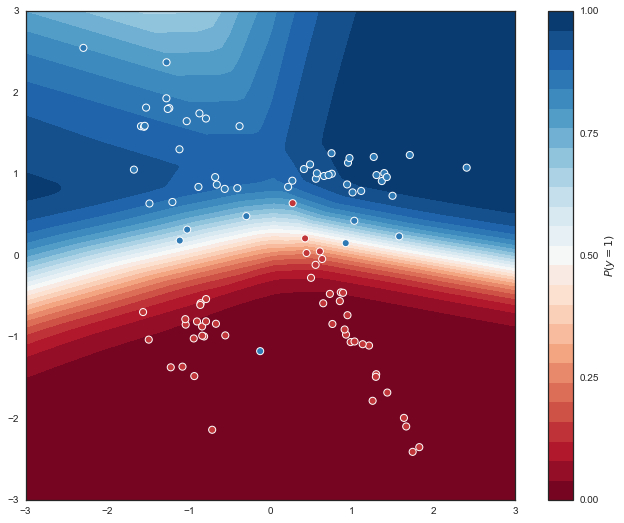

In [4]:
f, ax = plt.subplots(figsize=(12, 9))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-3, 3), ylim=(-3, 3))

In [5]:
def plot_decision_boundary(X_orig, y_orig, probs_orig, chaff_X=None, chaff_y=None, probs_poisoned=None):
    f, ax = plt.subplots(figsize=(12, 9))

    ax.scatter(X_orig[100:,0], X_orig[100:, 1], 
               c=y_orig[100:], s=50, cmap="gray",
               edgecolor="black", linewidth=1)
    
    if all([(chaff_X is not None),
            (chaff_y is not None),
            (probs_poisoned is not None)]):
        ax.scatter(chaff_X[:,0], chaff_X[:, 1], 
                   c=chaff_y, s=50, cmap="gray", 
                   marker="*", edgecolor="black", linewidth=1)
        ax.contour(xx, yy, probs_orig, levels=[.5], 
                   cmap="gray", vmin=0, vmax=.8)
        ax.contour(xx, yy, probs_poisoned, levels=[.5], 
                   cmap="gray")
    else:
        ax.contour(xx, yy, probs_orig, levels=[.5], cmap="gray")

    ax.set(aspect="equal", xlim=(-3, 3), ylim=(-3, 3))

## Original MLP classifier decision boundary fitted to the dataset

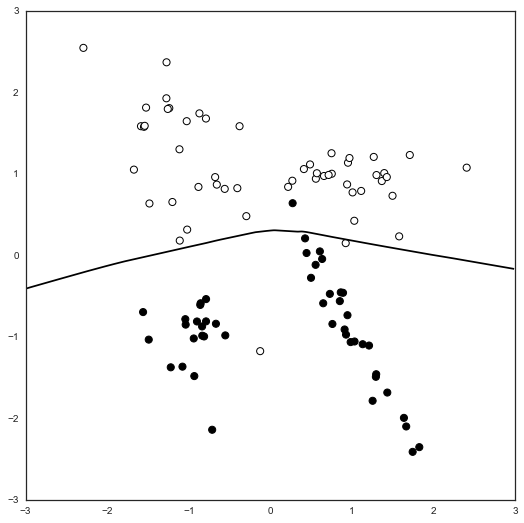

In [6]:
plot_decision_boundary(X, y, probs)

## Injecting 5% chaff (poisoning traffic)

In [7]:
num_chaff = 5
chaff_X = np.array([np.linspace(-2, -1, num_chaff), np.linspace(0.1, 0.1, num_chaff)]).T
chaff_y = np.ones(num_chaff)

## After 1x partial fitting

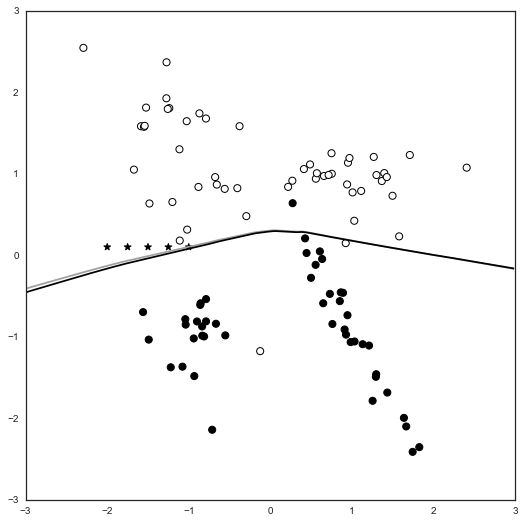

In [8]:
clf.partial_fit(chaff_X, chaff_y)
probs_poisoned = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
plot_decision_boundary(X, y, probs, chaff_X, chaff_y, probs_poisoned)

## After 2x partial fitting

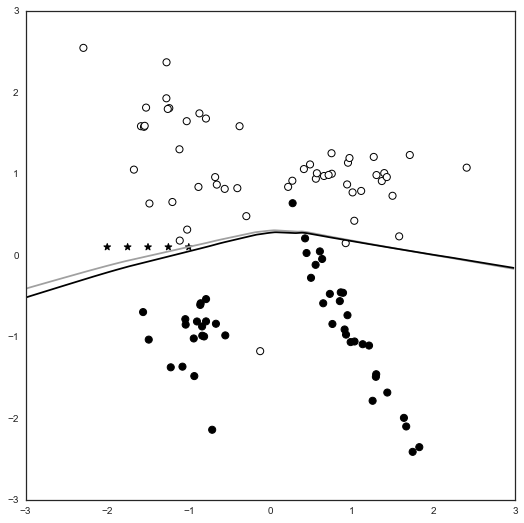

In [9]:
clf.partial_fit(chaff_X, chaff_y)
probs_poisoned = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
plot_decision_boundary(X, y, probs, chaff_X, chaff_y, probs_poisoned)

## After 3x partial fitting

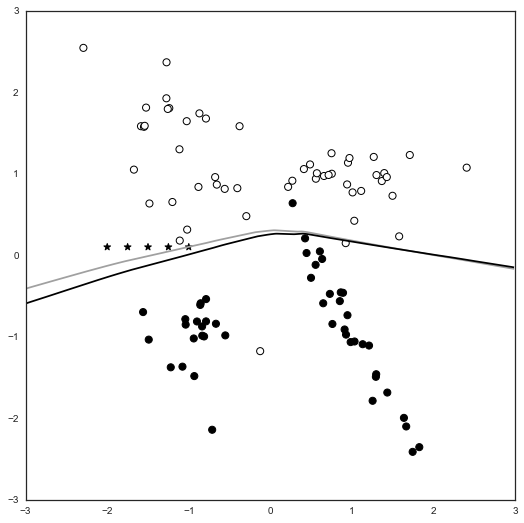

In [10]:
clf.partial_fit(chaff_X, chaff_y)
probs_poisoned = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
plot_decision_boundary(X, y, probs, chaff_X, chaff_y, probs_poisoned)

## After 4x partial fitting

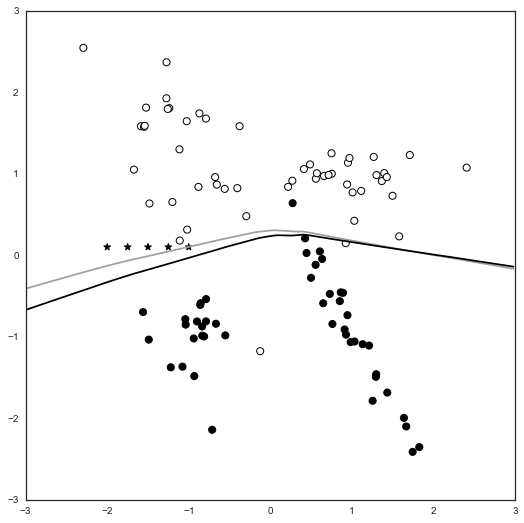

In [11]:
clf.partial_fit(chaff_X, chaff_y)
probs_poisoned = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
plot_decision_boundary(X, y, probs, chaff_X, chaff_y, probs_poisoned)

## After 5x partial fitting

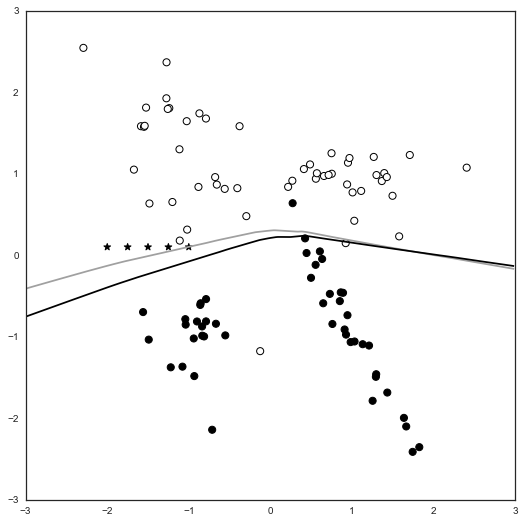

In [12]:
clf.partial_fit(chaff_X, chaff_y)
probs_poisoned = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
plot_decision_boundary(X, y, probs, chaff_X, chaff_y, probs_poisoned)